<a href="https://colab.research.google.com/github/Cicero-art/Projeto_Demissao_Funcionario/blob/Markdown-Regression-model/reports/regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Cicero-art/Projeto_Demissao_Funcionario.git


Cloning into 'Projeto_Demissao_Funcionario'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 135 (delta 63), reused 126 (delta 58), pack-reused 0 (from 0)
Receiving objects: 100% (135/135), 544.46 KiB | 5.85 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [ ]:
import numpy as np
from typing import Dict
from sklearn.metrics import roc_auc_score,roc_curve, precision_score, recall_score, accuracy_score, make_scorer


def evaluate_model(predictions: np.ndarray, y_true: np.ndarray, y_pred_proba: np.ndarray) -> Dict[str, float]:
    """
     Evaluates the performance of a model using various metrics.

     Parameters:
     - predictions: numpy array of model predictions
     - y_true: numpy array of true target values
     - y_pred_proba: numpy array of predicted probabilities for the positive class (1)

     Returns:
     - A dictionary containing the accuracy, ROC AUC, precision, and recall
    """
    metrics = {
        'accuracy': accuracy_score(y_true, predictions),
        'roc_auc': roc_auc_score(y_true, y_pred_proba),
        'precision': precision_score(y_true, predictions),
        "recall": recall_score(y_true, predictions)
    }
    return metrics

Modelo base de regressão logística:

*  Dados de teste: 0.2
*  Ponto de Corte: 0.5
*  Plot de Curva ROC








Threshold: 0.50
Accuracy: 0.77
ROC AUC: 0.81
Precision: 0.53
Recall: 0.25


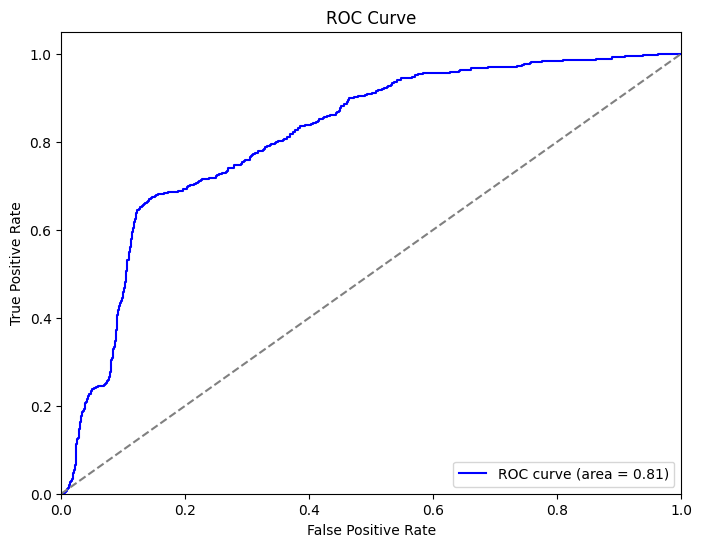

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



# Load data

df = pd.read_csv("/content/Projeto_Demissao_Funcionario/data/HR_comma_sep.csv")

# Label encode 'salary'
df['salary'] = LabelEncoder().fit_transform(df['salary'])

# One-hot encode 'department'
df = pd.get_dummies(df, columns=['department'], drop_first=True)

# Define the target and features
y = df["left"]
X = df.drop(columns=["left"])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions with probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Set the manual threshold
manual_threshold = 0.5

# Adjust predictions based on the threshold
predictions_manual = (y_pred_proba >= manual_threshold).astype(int)

# Evaluate performance with the manual threshold
metrics_manual = evaluate_model(predictions_manual, y_test, y_pred_proba)

# Print metrics
print(f"Threshold: {manual_threshold:.2f}")
print(f"Accuracy: {metrics_manual['accuracy']:.2f}")
print(f"ROC AUC: {metrics_manual['roc_auc']:.2f}")
print(f"Precision: {metrics_manual['precision']:.2f}")
print(f"Recall: {metrics_manual['recall']:.2f}")

#Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Comentários:**


*   Meu modelo está sendo conservador, ou seja, ele não está identificando muito dos verdadeiros positivos ( baixo recall ), e ainda quando o faz, ainda gera grande quantidade significativa de falso positivo ( precisão moderada ).

**Avaliação de outros pontos de corte**


In [ ]:
for threshold in np.arange(0.2, 0.8, 0.05):
    predictions_manual = (y_pred_proba >= threshold).astype(int)
    metrics_manual = evaluate_model(predictions_manual, y_test, y_pred_proba)
    print(f"Threshold: {threshold:.2f}, Precision: {metrics_manual['precision']:.2f}, Recall: {metrics_manual['recall']:.2f}")

Threshold: 0.20, Precision: 0.43, Recall: 0.78
Threshold: 0.25, Precision: 0.48, Recall: 0.72
Threshold: 0.30, Precision: 0.55, Recall: 0.69
Threshold: 0.35, Precision: 0.61, Recall: 0.65
Threshold: 0.40, Precision: 0.60, Recall: 0.51
Threshold: 0.45, Precision: 0.55, Recall: 0.33
Threshold: 0.50, Precision: 0.53, Recall: 0.25
Threshold: 0.55, Precision: 0.60, Recall: 0.24
Threshold: 0.60, Precision: 0.61, Recall: 0.22
Threshold: 0.65, Precision: 0.62, Recall: 0.16
Threshold: 0.70, Precision: 0.47, Recall: 0.06
Threshold: 0.75, Precision: 0.30, Recall: 0.02
Threshold: 0.80, Precision: 0.10, Recall: 0.00


2º Teste:
Resultado para o melhor ponto de corte custo benefício.
*   **thereshold = 0.35**









In [ ]:
# Set the manual threshold
manual_threshold = 0.35

# Adjust predictions based on the threshold
predictions_manual = (y_pred_proba >= manual_threshold).astype(int)

# Evaluate performance with the manual threshold
metrics_manual = evaluate_model(predictions_manual, y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {metrics_manual['accuracy']:.2f}")
print(f"ROC AUC: {metrics_manual['roc_auc']:.2f}")
print(f"Precision: {metrics_manual['precision']:.2f}")
print(f"Recall: {metrics_manual['recall']:.2f}")

Accuracy: 0.82
ROC AUC: 0.81
Precision: 0.61
Recall: 0.65


**MÉTODOS PARA ANÁLISE DE CONFIABILIDADE/DESEMPENHO DOS RESULTADOS**


1.   Validação Cruzada com threshold padrão de 0.5 utilizando shuffle



In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_accuracy = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
scores_roc_auc = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
scores_precision = cross_val_score(model, X_train, y_train, cv=skf, scoring='precision')
scores_recall = cross_val_score(model, X_train, y_train, cv=skf, scoring='recall')

print("____________VALIDAÇÃO CRUZADA COM THRESHOLD = 0.5____________\n")
print(f"Cross-validated Accuracy: {scores_accuracy.mean():.2f}")
print(f"Cross-validated ROC AUC: {scores_roc_auc.mean():.2f}")
print(f"Cross-validated Precision: {scores_precision.mean():.2f}")
print(f"Cross-validated Recall: {scores_recall.mean():.2f}")


____________VALIDAÇÃO CRUZADA COM THRESHOLD = 0.5____________

Cross-validated Accuracy: 0.77
Cross-validated ROC AUC: 0.81
Cross-validated Precision: 0.52
Cross-validated Recall: 0.25


**Comentário**


*   A Cross-validation utiliza como padrão o ponto de corte de 0.5, sendo necessário adaptar após cada fold de treinamento utilizar o 0.35 de thereshold




In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Using cross_val_predict to obtain predicted probabilities
y_pred_proba_cv = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")[:, 1]

# Applying the custom threshold
threshold = 0.35
y_pred_cv = (y_pred_proba_cv >= threshold).astype(int)

# Calculating metrics with the threshold of 0.35
accuracy_cv = accuracy_score(y_train, y_pred_cv)
precision_cv = precision_score(y_train, y_pred_cv)
recall_cv = recall_score(y_train, y_pred_cv)
roc_auc_cv = roc_auc_score(y_train, y_pred_proba_cv)

# Displaying the metrics
print("____________CROSS-VALIDATION WITH THRESHOLD = 0.35____________\n")
print(f"Cross-validated Accuracy: {accuracy_cv:.2f}")
print(f"Cross-validated ROC AUC: {roc_auc_cv:.2f}")
print(f"Cross-validated Precision: {precision_cv:.2f}")
print(f"Cross-validated Recall: {recall_cv:.2f}")




____________VALIDAÇÃO CRUZADA COM THRESHOLD = 0.35____________

Cross-validated Accuracy: 0.80
Cross-validated ROC AUC: 0.81
Cross-validated Precision: 0.58
Cross-validated Recall: 0.63


In [ ]:
model_1 = LogisticRegression(penalty="l1", solver='liblinear', max_iter=1000)
model_2 = LogisticRegression(penalty="l2", solver='lbfgs', max_iter=1000)
model_3 = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)


model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

manual_threshold = 0.35

y_pred_proba_1 = model_1.predict_proba(X_test)[:, 1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:, 1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:, 1]

predictions_manual_1 = (y_pred_proba_1 >= manual_threshold).astype(int)
predictions_manual_2 = (y_pred_proba_2 >= manual_threshold).astype(int)
predictions_manual_3 = (y_pred_proba_3 >= manual_threshold).astype(int)

metrics_manual_1 = evaluate_model(predictions_manual_1, y_test, y_pred_proba_1)
metrics_manual_2 = evaluate_model(predictions_manual_2, y_test, y_pred_proba_2)
metrics_manual_3 = evaluate_model(predictions_manual_3, y_test, y_pred_proba_3)


# Print metrics
print("____________PENALTY L1____________\n")
print(f"Accuracy: {metrics_manual_1['accuracy']:.2f}")
print(f"ROC AUC: {metrics_manual_1['roc_auc']:.2f}")
print(f"Precision: {metrics_manual_1['precision']:.2f}")
print(f"Recall: {metrics_manual_1['recall']:.2f}")


print("____________PENALTY L2____________\n")
print(f"Accuracy: {metrics_manual_2['accuracy']:.2f}")
print(f"ROC AUC: {metrics_manual_2['roc_auc']:.2f}")
print(f"Precision: {metrics_manual_2['precision']:.2f}")
print(f"Recall: {metrics_manual_2['recall']:.2f}")


print("____________PENALTY NONE____________\n")
print(f"Accuracy: {metrics_manual_3['accuracy']:.2f}")
print(f"ROC AUC: {metrics_manual_3['roc_auc']:.2f}")
print(f"Precision: {metrics_manual_3['precision']:.2f}")
print(f"Recall: {metrics_manual_3['recall']:.2f}")


____________PENALTY L1____________

Accuracy: 0.82
ROC AUC: 0.81
Precision: 0.61
Recall: 0.65
____________PENALTY L2____________

Accuracy: 0.82
ROC AUC: 0.81
Precision: 0.61
Recall: 0.65
____________PENALTY NONE____________

Accuracy: 0.82
ROC AUC: 0.81
Precision: 0.61
Recall: 0.65


Verificando se há similaridade entre os coeficientes.

In [ ]:
print("Coeficientes do Modelo 1 (L1):", model_1.coef_)
print("Coeficientes do Modelo 2 (L2):", model_2.coef_)
print("Coeficientes do Modelo 3 (Nenhum):", model_3.coef_)


Coeficientes do Modelo 1 (L1): [[-4.08270126  0.72870212 -0.31139344  0.00446388  0.2419842  -1.46840079
  -1.36963907 -0.01389846 -0.47652696  0.0715613   0.43242752 -0.63628361
   0.20504208  0.          0.16660116  0.17722443  0.21279578]]
Coeficientes do Modelo 2 (L2): [[-4.07144231  0.74474878 -0.31260973  0.00434493  0.23756542 -1.45460224
  -1.07533791 -0.01625784 -0.43694485  0.11098734  0.44011272 -0.63151806
   0.21913261  0.03588794  0.19993347  0.21331382  0.24577787]]
Coeficientes do Modelo 3 (Nenhum): [[-4.10510928  0.82353064 -0.31706718  0.00443784  0.2426009  -1.48985562
  -1.36389313 -0.01630052 -0.45724904  0.08996425  0.45721495 -0.60866788
   0.22726807  0.01444657  0.19592493  0.19749715  0.23065701]]


# Observação
---
As mudanças entre as penalidades do **Lasso (L1)** eliminando feature não foi suficiente para criar uma variação significativa nas previsões. Assim como o **Ridge (L2)** que tende a reduzir de forma mais suave o impacto de algumas
features também não foi o suficiente para alterar.

## Regularizando os dados para a escala de 0-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler and transform the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the three models with the scaled data
model_1.fit(X_train_scaled, y_train)
model_2.fit(X_train_scaled, y_train)
model_3.fit(X_train_scaled, y_train)

manual_threshold = 0.35

# Make predictions using probabilities on the scaled test set
y_pred_proba_1 = model_1.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_2 = model_2.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_3 = model_3.predict_proba(X_test_scaled)[:, 1]

# Apply the manual threshold to convert probabilities into binary predictions
predictions_manual_1 = (y_pred_proba_1 >= manual_threshold).astype(int)
predictions_manual_2 = (y_pred_proba_2 >= manual_threshold).astype(int)
predictions_manual_3 = (y_pred_proba_3 >= manual_threshold).astype(int)

# Evaluate the models
metrics_manual_1 = evaluate_model(predictions_manual_1, y_test, y_pred_proba_1)
metrics_manual_2 = evaluate_model(predictions_manual_2, y_test, y_pred_proba_2)
metrics_manual_3 = evaluate_model(predictions_manual_3, y_test, y_pred_proba_3)

# Print the metrics for each model
print("---Model 1 --- Penalty 1 ---")
print(f"Accuracy: {metrics_manual_1['accuracy']:.2f}")
print(f"ROC AUC: {metrics_manual_1['roc_auc']:.2f}")
print(f"Precision: {metrics_manual_1['precision']:.2f}")
print(f"Recall: {metrics_manual_1['recall']:.2f}")

print("---Model 2 --- Penalty 2 ---")
print(f"Accuracy: {metrics_manual_2['accuracy']:.2f}")
print(f"ROC AUC: {metrics_manual_2['roc_auc']:.2f}")
print(f"Precision: {metrics_manual_2['precision']:.2f}")
print(f"Recall: {metrics_manual_2['recall']:.2f}")

print("---Model 3 --- Penalty 3 ---")
print(f"Accuracy: {metrics_manual_3['accuracy']:.2f}")
print(f"ROC AUC: {metrics_manual_3['roc_auc']:.2f}")
print(f"Precision: {metrics_manual_3['precision']:.2f}")
print(f"Recall: {metrics_manual_3['recall']:.2f}")


---Modelo 1 --- Penalty 1 ---
Accuracy: 0.82
ROC AUC: 0.81
Precision: 0.61
Recall: 0.65
---Modelo 2 --- Penalty 2 ---
Accuracy: 0.82
ROC AUC: 0.81
Precision: 0.61
Recall: 0.65
---Modelo 3 --- Penalty 3 ---
Accuracy: 0.82
ROC AUC: 0.81
Precision: 0.61
Recall: 0.65



**Regularização** não teve impacto significativo nas métricas

# Método de Utilização do Modelo

O objetivo principal do modelo é **manter uma alta sensibilidade**, o que implica em utilizar um **threshold menor (0,35)**. Essa abordagem permite capturar um maior número de funcionários em risco, facilitando uma estratégia de **prevenção proativa**.

## Racional para Utilizar Threshold de 0.35

- **Alta Sensibilidade**: Com um threshold mais baixo, o modelo consegue capturar mais funcionários que têm potencial de deixar a empresa.
- **Prevenção Proativa**: A captura antecipada de mais funcionários em risco permite ao RH **intervir mais cedo**, oferecendo soluções personalizadas para evitar a saída.




In [ ]:
count_high_risk = sum(y_pred_proba_2 >= manual_threshold)
total = sum(y_pred_proba_2)
percentage_high_risk = (count_high_risk / len(y_test)) * 100
print(f"Número de funcionários com probabilidade de saída maior que 35% (em risco) : {count_high_risk}")
print(f"Percentagem de funcionários com probabilidade de saída maior que 35% (em risco): {percentage_high_risk:.2f}%")


Número de funcionários com probabilidade de saída maior que 35% (em risco) : 763
Percentagem de funcionários com probabilidade de saída maior que 35% (em risco): 25.43%
3000


In [ ]:
# Filter employees with a probability greater than or equal to 0.35
high_risk_probs = y_pred_proba_2[y_pred_proba_2 >= manual_threshold]

# Sort emplyees with a probability greater than or equal to 0.35
high_risk_probs_sorted = np.sort(high_risk_probs)[::-1]

# Total number of high risk employees
num_high_risk = len(high_risk_probs_sorted)

# Define percentiles
percentiles = [0.05, 0.2, 0.50]

# Dictionary to store percentile cutoffs and corresponding actions
actions = {}

for p in percentiles:
  # Find the cut-off index for the current percentile
  cut_index = int(p * num_high_risk)

  # Determine the probability value at the cut-off point
  cutoff_value = high_risk_probs_sorted[cut_index - 1]

  # Store the cut-off probability value
  actions[p] = {"cutoff_value" : cutoff_value, "num_employees": cut_index}

for p, values in actions.items():
    print(f"Top {int(p*100)}% of high-risk employees:")
    print(f"  - Probability cut-off: {values['cutoff_value']:.2f}")
    print(f"  - Number of employees: {values['num_employees']}")

Top 5% of high-risk employees:
  - Probability cut-off: 0.75
  - Number of employees: 38
Top 20% of high-risk employees:
  - Probability cut-off: 0.66
  - Number of employees: 152
Top 50% of high-risk employees:
  - Probability cut-off: 0.46
  - Number of employees: 381


## Ações que serão utilizadas para Retenção de Funcionários

### 1. **Top 5% - Ações Intensivas** (Alto Risco)
Esses funcionários representam o grupo com maior probabilidade de saída da empresa. Ações personalizadas e rápidas

#### Ações Recomendadas:
- **Entrevistas Individuais com Foco em Retenção**: Realizar conversas individuais para entender **preocupações e expectativas** sobre satisfação, salário e oportunidades de crescimento.
  
- **Planos de Carreira Personalizados**: Apresentar planos de carreira específicos, destacando **promoções** e **novos desafios** dentro da empresa.

- **Ajustes Salariais e Benefícios**: Oferecer **ajustes salariais** ou melhorias em benefícios para reter talentos.

- **Mentoria com Líderes**: Oferecer **mentoria direta** com executivos ou líderes seniores, valorizando e reconhecendo esses funcionários. Contratar Mestre **Kapp** como mentor não tem erro.

---

### 2. **Top 20% - Ações Moderadas** (Risco Moderado)
Esse grupo ainda tem um risco significativo de saída, mas as ações podem ser menos personalizadas, focando em **melhorias estruturais**.

#### Ações Recomendadas:
- **Feedback Frequente e Acompanhamento**: Realizar **sessões de feedback regulares** para entender as necessidades e oportunidades de crescimento.

- **Revisões de Salário e Benefícios de Médio Prazo**: Avaliar os pacotes de remuneração e oferecer **bônus por desempenho** ou melhorias em benefícios.

- **Promoções Internas e Novas Oportunidades**: Criar oportunidades de **mobilidade interna** ou **mudanças de função** dentro da empresa.

---

### 3. **Ações Básicas para o restante** (Risco Baixo, mas Importante Monitorar)
Esse grupo tem um risco relativamente baixo, mas deve ser acompanhado.

#### Ações Recomendadas:
- **Engajamento em Grupo**: Realizar **pesquisas de clima organizacional** e reuniões em grupo para entender percepções gerais e melhorar o bem-estar.

- **Reconhecimento Regular**: Implementar **programas de reconhecimento** como prêmios trimestrais ou anuais por desempenho.

- **Melhorar Comunicação e Cultura Organizacional**: Promover a **transparência** e incentivar **sessões de perguntas e respostas** com a liderança.

- **Aumentar as Oportunidades de Crescimento**: Criar **planos de desenvolvimento de longo prazo** e oferecer **treinamento contínuo**.
---

### Resumo das Ações por Percentil:

| Percentil (Risco) | Ações |
|-------------------|-------|
| **Top 5%** (Alto Risco)  | Conversas Individuais, Planos de Carreira Personalizados, Ajustes Salariais, Mentoria com Líderes |
| **Top 20%** (Risco Moderado) | Feedback Frequente, Promoções Internas, Revisões Salariais Moderadas |
| **Grupo de Ação Preventiva** (Risco Baixo) | Engajamento em Grupo, Programas de Reconhecimento, Melhorar Comunicação, Oportunidades de Crescimento |


# SHAP VALUE

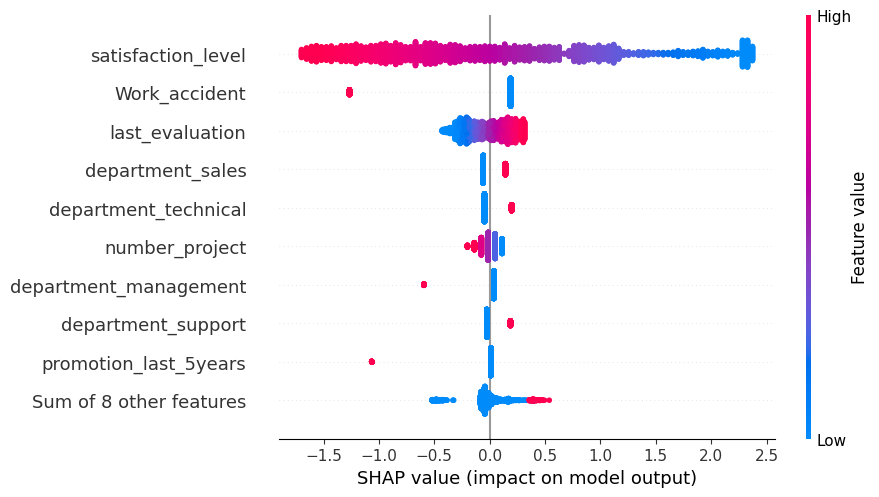

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.LinearExplainer(model_2, X_train_scaled)

## Compute SHAP values for the test set scaled
shap_values = explainer.shap_values(X_test_scaled)

# Convert SHAP values into an `Explanation` object
shap_values_exp = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test_scaled, feature_names=X.columns)

# Plot
shap.plots.beeswarm(shap_values_exp)

## Comparação dos Resultados do SHAP com a Análise Exploratória Inicial

---

### Resumo da Comparação

| Variável                        | Análise Exploratória Inicial                | SHAP Value                                           | Conclusão                                       |
|----------------------------------|--------------------------------------------|-----------------------------------------------------|------------------------------------------------|
| **Satisfaction Level**           | Alta Relevância                             | Alta Relevância, maior impacto                      | Alinhado com a análise inicial                 |
| **Number of Projects**           | Alta Relevância                             | Relevância menor                                    | Menos importante do que previsto               |
| **Salary**                       | Alta Relevância                             | Menor Relevância                                    | Menos importante do que previsto                        |
| **Promotion Last 5 Years**       | Alta Relevância                             | Baixa Relevância                                    | Menos importante do que previsto               |
| **Work Accident**                | Menor Relevância                            | Alta Relevância                                     | Muito mais importante do que previsto          |
| **Department**                   | Menor Relevância                            | Menor Relevância                                    | Alinhado com a análise inicial                 |

### Conclusão Geral:
Os resultados do SHAP value forneceram insights adicionais que complementam e, em alguns casos, **contradizem** a análise exploratória inicial. Variáveis como **work_accident**, que não foram consideradas relevantes inicialmente, mostraram um impacto muito maior do que o esperado. Por outro lado, variáveis como **promotion_last_5years** e **salary**, que pareciam importantes, tiveram menor impacto no modelo.

